In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def spline(xs, ys, x):
    def h(i):
        if i == 0:
            i += 1
        return xs[i] - xs[i-1]
    
    def all_args(i):
        F = (ys[i+1] - ys[i])/h(i+1) - (ys[i] - ys[i-1])/h(i)
        A = h(i)/6
        B = (h(i) + h(i+1))/3
        C = h(i+1)/6
        return (A, B, C, F)
    
    def alpha(i):
        A, B, C, F = all_args(i-1)
        if i == 1:
            return -C/B
        return -C/(A*alpha(i-1) + B)
    
    def beta(i):
        A, B, C, F = all_args(i-1)
        if i == 1:
            return F/B
        return (F - A*beta(i-1))/(A*alpha(i-1) + B)
    
    def gamma(i):
        if i == 0 or i == len(xs) - 1:
            return 0
        if i == len(xs) - 2:
            A, B, C, F = all_args(i)
            return (F - A*beta(i)) / (B + A*alpha(i))
        return alpha(i+1) * gamma(i+1) + beta(i+1)
    
    i = 0
    vals = []
    for xi in x:
        while (i < len(xs) - 2) and not(xs[i] <= xi <= xs[i+1]) and (xi >= xs[i]):
            i += 1
        prt1 = (xs[i+1] - xi)/h(i+1)
        prt2 = (xi - xs[i])/h(i+1)
        prt3 = ((xs[i+1] - xi)**3 - h(i+1)**2 * (xs[i+1] - xi))/(6*h(i+1))
        prt4 = ((xi - xs[i])**3 - h(i+1)**2 * (xi - xs[i]))/(6*h(i+1))
        val = ys[i] * prt1 \
            + ys[i+1] * prt2 \
            + gamma(i) * prt3 \
            + gamma(i+1) * prt4
        vals += [val]
    return vals

def h(xs, i):
    if i == 0:
        i += 1
    return xs[i] - xs[i-1]

def get_i(xs, ys, x):
    i = 0
    while (i < len(xs) - 2) and not(xs[i] <= x <= xs[i+1]) and (x >= xs[i]):
        i += 1
    return i

In [27]:
'''
def Jacobi(xs1, ys1, xs2, ys2, x):
    spl1 = spline(xs1, ys1, x)
    gammai_1 = spl1.gamma(spl1.get_i(x))
    gammei1_1 = spl1.gamma(spl1.get_i(x) + 1)
    spl2 = spline(xs2, ys2, x)
    gammai_2 = spl2.gamma(spl2.get_i(x))
    gammai1_2 = spl2.gamma(spl2.get_i(x) + 1)
    
    gammai = 
    
    ys =
'''

def all_args(xs, ys, i):
        F = (ys[i+1] - ys[i])/h(xs, i+1) - (ys[i] - ys[i-1])/h(xs, i)
        A = h(xs, i)/6
        B = (h(xs, i) + h(xs, i+1))/3
        C = h(xs, i+1)/6
        return (A, B, C, F)
    
def alpha(xs, ys, i):
    A, B, C, F = all_args(xs, ys, i-1)
    if i == 1:
        return -C/B
    return -C/(A*alpha(xs, ys, i-1) + B)

def beta(xs, ys, i):
    A, B, C, F = all_args(xs, ys, i-1)
    if i == 1:
        return F/B
    return (F - A*beta(xs, ys, i-1))/(A*alpha(xs, ys, i-1) + B)

def gamma(xs, ys, i):
    if i == 0 or i == len(xs) - 1:
        return 0
    if i == len(xs) - 2:
        A, B, C, F = all_args(xs, ys, i)
        return (F - A*beta(xs, ys, i)) / (B + A*alpha(xs, ys, i))
    return alpha(xs, ys, i+1) * gamma(xs, ys, i+1) + beta(xs, ys, i+1)

def deriv_f(xs, ys, x):
    i = get_i(xs, ys, x)
    prt1 = -ys[i]/h(xs, i+1)
    prt2 = ys[i+1]/h(xs, i+1)
    prt3 = (-1)*(((h(xs, i+1))**2 - 3*(x - xs[i])**2)/(6*h(xs, i+1)))*gamma(xs, ys, i)
    prt4 = (((h(xs, i+1))**2 - 3*(x - xs[i+1])**2)/(6*h(xs, i+1)))*gamma(xs, ys, i+1)
    return prt1 + prt2 + prt3 + prt4

def der_der_f(xs, ys, x):
    i = get_i(xs, ys, x)
    prt1 = (x - xs[i])/h(xs, i+1)*gamma(xs, ys, i)
    prt2 = (x - xs[i+1])/h(xs, i+1)*gamma(xs, ys, i+1)
    return prt1 + prt2

def der_c(xs, ys):
    dx = xs[1:-1]
    dy = []
    for i in range(1, len(xs) - 1):
        dy += [ (ys[i+1] - ys[i-1])/(xs[i+1] - xs[i-1]) ]
    return dx, dy

def f_sub(xs1, ys1, xs2, ys2, f, x):
    if f == spline:
        return f(xs1, ys1, [x])[0] - f(xs2, ys2, [x])[0]
    return f(xs1, ys1, x) - f(xs2, ys2, x)

def newtone(xs1, ys1, xs2, ys2, eps):
    a = min(xs1[0], xs2[0])
    b = max(xs1[-1], xs2[-1])
    xs = np.arange(a, b, eps)
    if (f_sub(xs1, ys1, xs2, ys2, der_der_f, a)) \
        * (f_sub(xs1, ys1, xs2, ys2, spline, b)) > 0:
        x = a
    else:
        x = b
        
    it = 0
    while (abs(f_sub(xs1, ys1, xs2, ys2, deriv_f, x)) > eps) and (it < 1e3):
        x = x - f_sub(xs1, ys1, xs2, ys2, spline, x) \
            * f_sub(xs1, ys1, xs2, ys2, deriv_f, x)
    return x

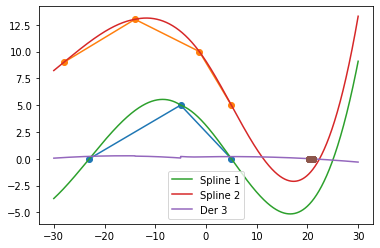

In [45]:
a, b = -30, 30
X1 = [-23, -5, 5]
Y1 = [0, 5, 0]
X2 = [-28, -14, -1.32, 5]
Y2 = [9, 13, 10, 5]

x0 = np.arange(a, b+0.01, 0.01)
y01 = spline(X1, Y1, x0)
dx1, dy1 = der_c(x0, y01)
y02 = spline(X2, Y2, x0)
dx2, dy2 = der_c(x0, y02)
dx3 = dx1
dy3 = [ (dy1[i] - dy2[i]) for i in range(len(dy2)) ]
dx0, dy0 = [], []
for i in range(len(dy3)):
    if abs(dy3[i]) < 1e-2:
        dx0 += [ dx3[i] ]
        dy0 += [ dy3[i] ]

plt.plot(X1, Y1, marker="o")
plt.plot(X2, Y2, marker="o")

plt.plot(x0, y01, label = "Spline 1")
plt.plot(x0, y02, label = "Spline 2")
plt.plot(dx3, dy3, label = "Der 3")
plt.plot(dx0, dy0, "o")

#intersect = newtone(X1, Y1, X2, Y2, 1e-3)
#print(intersect)
#plt.plot(intersect, spline(X1, Y1, [intersect]), marker="o", color="Red")

plt.legend()
plt.show()

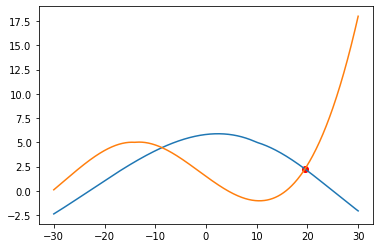

In [47]:
from parse import *

def print_spline_from_file(file, mark=""):
    f = open(file, "r").readlines()
    M = [ m.split(",") for m in f ][0]
    X, Y = [], []
    for m in M:
        if m == " ":
            continue
        x, y = m.split()
        X += [float(x)]
        Y += [float(y)]
    plt.plot(X, Y, marker=mark)
    return (X, Y)

plt.plot([19.529940], [2.247131], marker="o", color="red")
    
print_spline_from_file("../Input and tests/1.out")
print_spline_from_file("../Input and tests/2.out")
plt.show()